In [43]:
import torch

print(torch.__version__)

2.3.1


In [44]:
x = torch.tensor(5.0)

y = 3 * x ** 2
print(y)

tensor(75.)


In [45]:
x = torch.tensor(5.0, requires_grad=True)
y = 3 * x ** 2

y.backward()
print(x.grad)

tensor(30.)


In [46]:
def rosenbrock(x0, x1):
		y = 100 * (x1 - x0 ** 2) ** 2 +  (x0 - 1) ** 2
		return y

x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


In [47]:
lr = 0.001
iters = 10000

for i in range(iters):
	if i % 1000 == 0:
		print(x0.item(), x1.item())
  
	y = rosenbrock(x0, x1)
  
	y.backward()

	x0.data -= lr * x0.grad.data
	x1.data -= lr * x1.grad.data

	x0.grad.zero_()
	x1.grad.zero_()

print(x0.item(), x1.item())

0.0 2.0
0.6815015077590942 0.46292299032211304
0.8253857493400574 0.6804871559143066
0.8942827582359314 0.7992911338806152
0.9331904053688049 0.8705660700798035
0.9568046927452087 0.9152978658676147
0.9716982245445251 0.9440822601318359
0.9813036918640137 0.9628812670707703
0.98758465051651 0.9752733111381531
0.9917276501655579 0.983490526676178
0.9944759607315063 0.9889602065086365


In [48]:
torch.manual_seed(0)

x = torch.rand(100, 1)
y = 2 * x + 5 + torch.rand(100, 1)

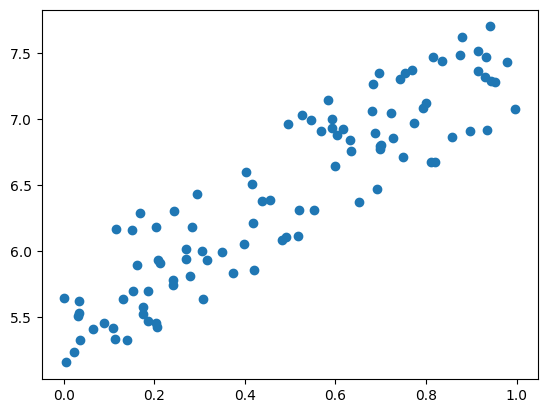

In [49]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [50]:
torch.manual_seed(0)
# x = torch.rand(100, 1)
# y = 5 + 2 * x + torch.randn(100, 1)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def predict(x):
	y = x @ W + b
	return y

def mean_squared_error(x0, x1):
	diff = x0 - x1
	N = len(diff)
	return torch.sum(diff ** 2) / N

lr = 0.1
iters = 100


for i in range(iters):
	y_hat = predict(x)
	loss = mean_squared_error(y, y_hat)

	loss.backward()

	W.data -= lr * W.grad.data
	b.data -= lr * b.grad.data

	W.grad.zero_()
	b.grad.zero_()

	if i % 10 == 0:
		print(loss.item())

print(loss.item())
print("====")
print("W = ", W.item())
print("b = ", b.item())


41.89796447753906
0.22483204305171967
0.0925208106637001
0.0888015553355217
0.08627457916736603
0.08435674756765366
0.0829005315899849
0.0817948430776596
0.08095530420541763
0.08031783998012543
0.07987643033266068
====
W =  2.2863590717315674
b =  5.3144850730896


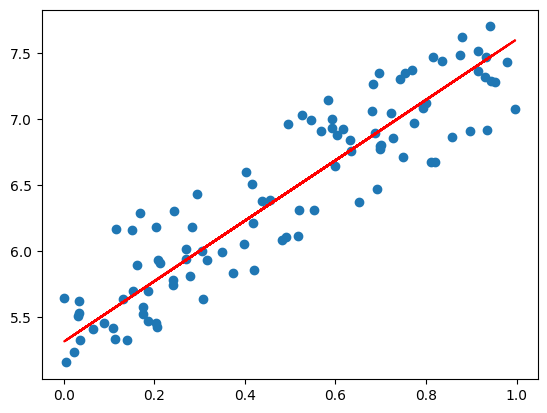

In [51]:
plt.scatter(x, y)
plt.plot(x, predict(x).detach().numpy(), color='red')
plt.show()


In [52]:
import torch.nn as nn

W = nn.Parameter(torch.zeros((1, 1)))
b = nn.Parameter(torch.zeros(1))

print(W)
print(b)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [53]:
class Model(nn.Module):
	def __init__(self):
		super(Model, self).__init__()
		self.W = nn.Parameter(torch.zeros((1, 1)))
		self.b = nn.Parameter(torch.zeros(1))

	def forward(self, x):
		y = x @ self.W + self.b
		return y
	
model = Model()

for param in model.parameters():
	print(param)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [54]:
class Model(nn.Module):
	def __init__(self, input_size=1, output_size=1):
		super(Model, self).__init__()
		self.linear = nn.Linear(input_size, output_size)

	def forward(self, x):
		y = self.linear(x)
		return y
	
model = Model()
for param in model.parameters():
	print(param)

Parameter containing:
tensor([[-0.0075]], requires_grad=True)
Parameter containing:
tensor([0.5364], requires_grad=True)


In [55]:
lr = 0.1
iters = 100

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
	y_hat = model(x)
	loss = nn.functional.mse_loss(y_hat, y)

	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	if i % 10 == 0:
		print(loss.item())

58.202789306640625
0.25893545150756836
0.08050956577062607
0.07956507802009583
0.07926097512245178
0.0790313333272934
0.07885695993900299
0.07872456312179565
0.07862406969070435
0.07854775339365005


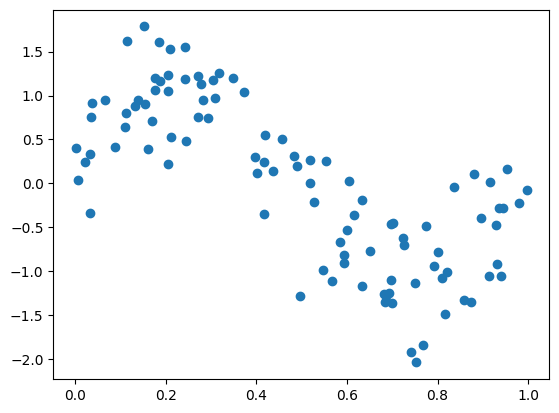

In [79]:
torch.manual_seed(0)

x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.randn(100, 1) * 0.5

plt.scatter(x, y)

In [80]:
import torch.nn.functional as F


a = torch.rand(100, 5)
b = F.sigmoid(a)
c = F.relu(a)

In [81]:
class Model(nn.Module):
	def __init__(self, input_size=1, hidden_size=10, output_size=1):
		super(Model, self).__init__()
		self.linear1 = nn.Linear(input_size, hidden_size)
		self.linear2 = nn.Linear(hidden_size, output_size)

	def forward(self, x):
		y = self.linear1(x)
		y = F.sigmoid(y)
		y = self.linear2(y)
		return y

In [82]:
lr = 0.2
iters = 10000

model = Model()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
	y_pred = model(x)
	loss = F.mse_loss(y, y_pred)
  
	loss.backward()
	optimizer.step()
	optimizer.zero_grad()
  
	if i % 1000 == 0:
		print(loss.item())

print(loss.item())

0.8828694224357605
0.391061931848526
0.378248393535614
0.32845279574394226
0.23307664692401886
0.20587238669395447
0.20345886051654816
0.20261737704277039
0.20193296670913696
0.20133888721466064
0.2008093297481537


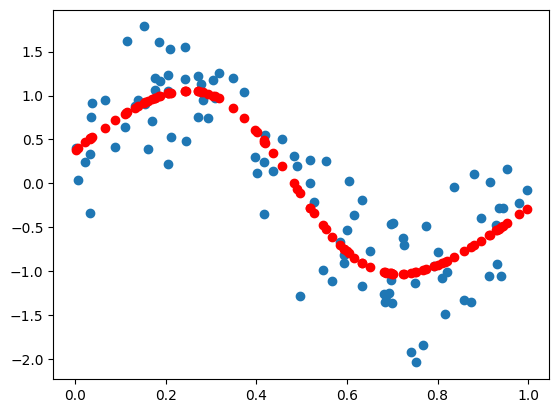

In [84]:
plt.scatter(x, y)
plt.scatter(x, model(x).detach().numpy(), color='red')

In [85]:
import torchvision

print(torchvision.__version__)

0.18.1


In [89]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

dataset = torchvision.datasets.MNIST(
	root='./data',
	train=True,
	transform=transforms.ToTensor(),
	download=True
)

x, label = dataset[0]

print("size: ", len(dataset))
print("tyle: ", type(x))
print("label: ", label)


size:  60000
tyle:  <class 'torch.Tensor'>
label:  5


In [90]:
import torch

dataloader = torch.utils.data.DataLoader(
  dataset,
  batch_size=32,
  shuffle=True
)

for x, label in dataloader:
  print("x shape: ", x.shape)
  print("label shape: ", label.shape)
  break

x shape:  torch.Size([32, 1, 28, 28])
label shape:  torch.Size([32])
